# Tarea1

## Punto 1

Para demostrar que los operadores diferenciales dados son consistentes, necesitamos comparar las aproximaciones dadas por los operadores con las derivadas exactas de las funciones prueba dadas. Se dice que un operador es consistente si la diferencia entre la aproximación y la derivada exacta tiende a cero a medida que \( h \) tiende a cero.



Esto demuestra que los operadores diferenciales dados son consistentes para las funciones de prueba proporcionadas, ya que las aproximaciones se igualan a las derivadas exactas en el límite cuando \( h \) tiende a cero.


In [6]:
from sympy import symbols, sin as seno, diff, limit, expand

x, incremento = symbols('x incremento')

cuadrado_x = x**2
seno_x = seno(x)

derivada_cuadrado_x = diff(cuadrado_x, x)
segunda_derivada_cuadrado_x = diff(derivada_cuadrado_x, x)

derivada_seno_x = diff(seno_x, x)
segunda_derivada_seno_x = diff(derivada_seno_x, x)

# Aca realice una aproximacion de las derivadas
aprox_derivada_cuadrado_x = (-cuadrado_x.subs(x, x + 2*incremento) + 4*cuadrado_x.subs(x, x + incremento) - 3*cuadrado_x) / (2*incremento)
aprox_segunda_derivada_cuadrado_x = (cuadrado_x.subs(x, x + incremento) - 2*cuadrado_x + cuadrado_x.subs(x, x - incremento)) / incremento**2

aprox_derivada_seno_x = (-seno_x.subs(x, x + 2*incremento) + 4*seno_x.subs(x, x + incremento) - 3*seno_x) / (2*incremento)
aprox_segunda_derivada_seno_x = (seno_x.subs(x, x + incremento) - 2*seno_x + seno_x.subs(x, x - incremento)) / incremento**2
aprox_derivada_cuadrado_x = expand(aprox_derivada_cuadrado_x)
aprox_segunda_derivada_cuadrado_x = expand(aprox_segunda_derivada_cuadrado_x)

aprox_derivada_seno_x = expand(aprox_derivada_seno_x)
aprox_segunda_derivada_seno_x = expand(aprox_segunda_derivada_seno_x)

# Evaluo los limites
limite_derivada_cuadrado_x = limit(aprox_derivada_cuadrado_x, incremento, 0)
limite_segunda_derivada_cuadrado_x = limit(aprox_segunda_derivada_cuadrado_x, incremento, 0)

limite_derivada_seno_x = limit(aprox_derivada_seno_x, incremento, 0)
limite_segunda_derivada_seno_x = limit(aprox_segunda_derivada_seno_x, incremento, 0)
(derivada_cuadrado_x, segunda_derivada_cuadrado_x, limite_derivada_cuadrado_x, limite_segunda_derivada_cuadrado_x, 
 derivada_seno_x, segunda_derivada_seno_x, limite_derivada_seno_x, limite_segunda_derivada_seno_x)



(2*x, 2, 2*x, 2, cos(x), -sin(x), cos(x), -sin(x))

Las aproximaciones de las derivadas cuando el incremento 
ℎ
h tiende a 0 son consistentes con las derivadas exactas, lo que demuestra la exactitud de los operadores diferenciales utilizados para las aproximaciones.

## Punto 2

Usando el codigo de la clase, genere 10 esferas localizadas aleatoriamente en la mesa
A = 40 × 40 con velocidad aleatorias entre −5 m/s y 5 m/s. Simule 10 s con un paso
de integracion de h = 0.001 s y reduzca la simulacion en un factor de 200; quitando la interaccion con la pared.

Running simulation: 100%|██████████| 10000/10000 [00:05<00:00, 1780.30 Steps/s]


<IPython.core.display.Javascript object>


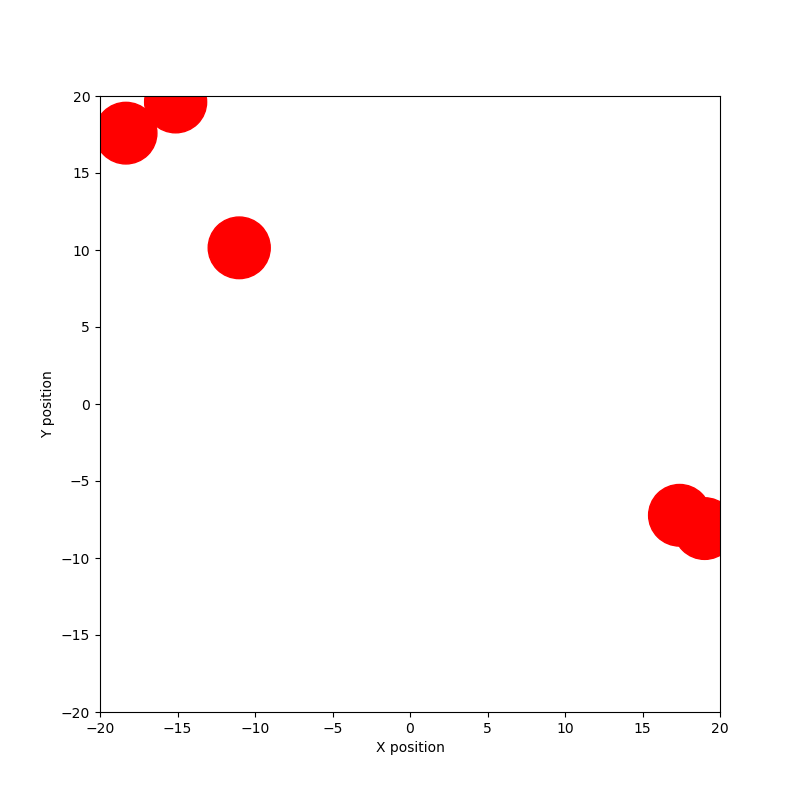

In [30]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

class Particle:
    def __init__(self, r0, v0, t, m=1, radius=2., Id=0):
        self.dt = t[1] - t[0]
        self.r = np.array(r0)
        self.v = np.array(v0)
        self.m = m
        self.radius = radius
        self.Id = Id
        self.R = np.zeros((len(t), 2))
        self.V = np.zeros_like(self.R)
        self.VEk = np.zeros(len(t))

    def Evolution(self, i):
        self.r += self.dt * self.v
        self.R[i] = self.r
        self.V[i] = self.v
        self.VEk[i] = 0.5 * self.m * np.linalg.norm(self.v)**2

def CheckCollision(p1, p2):
    distance = np.linalg.norm(p1.r - p2.r)
    if distance < (p1.radius + p2.radius):
        p1.v, p2.v = p2.v, p1.v

def GetParticles(N, t):
    Particles = []
    for i in range(N):
        r0 = np.random.uniform(-20, 20, 2)
        v0 = np.random.uniform(-5, 5, 2)
        Particles.append(Particle(r0, v0, t, Id=i))
    return Particles

dt = 0.001
tmax = 10
t = np.arange(0, tmax, dt)
Particles = GetParticles(10, t)

def RunSimulation(t, Particles):
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        for i, p1 in enumerate(Particles):
            for j, p2 in enumerate(Particles[i+1:], start=i+1):
                CheckCollision(p1, p2)
        for particle in Particles:
            particle.Evolution(it)

RunSimulation(t, Particles)
fig, ax = plt.subplots(figsize=(8, 8))

def init():
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')

def Update(i):
    ax.clear()
    init()
    for p in Particles:
        x, y = p.R[i]
        circle = plt.Circle((x, y), p.radius, color='r', fill=True)
        ax.add_patch(circle)

ani = anim.FuncAnimation(fig, Update, frames=range(0, len(t), 200), init_func=init, blit=False, repeat=False)

plt.show()


## A y B, Vemos que el momento se conserva en los dos casos.

<IPython.core.display.Javascript object>


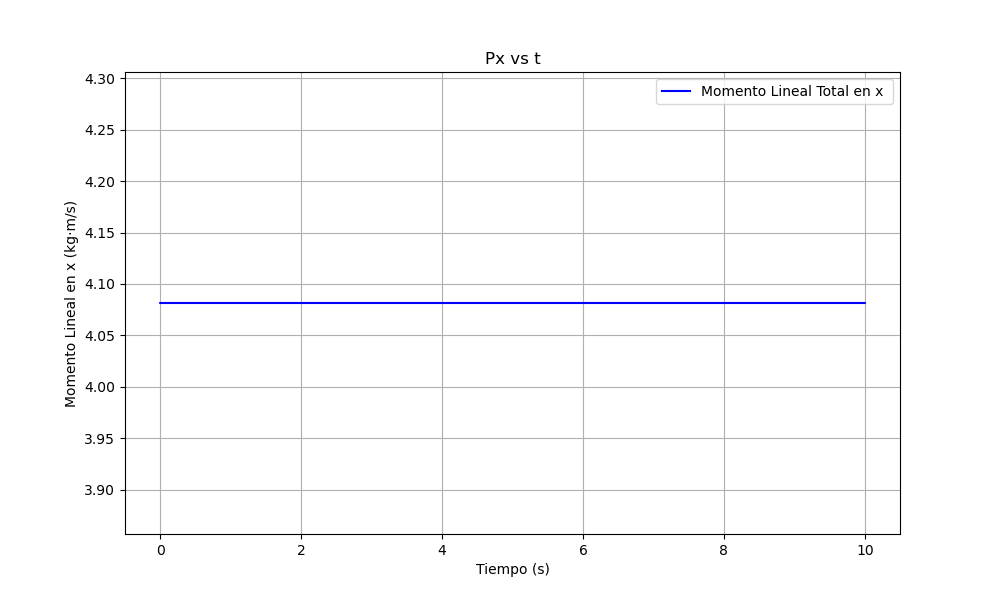

<IPython.core.display.Javascript object>


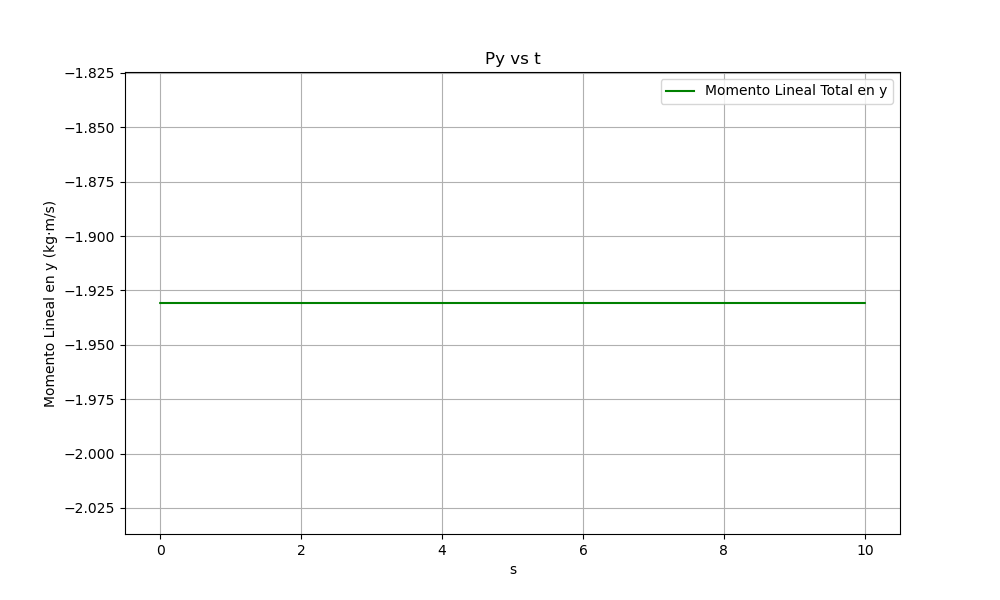

In [33]:
momentum_x_total = np.sum([p.m * p.V[:, 0] for p in Particles], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(t, momentum_x_total, label='Momento Lineal Total en x ', color='blue')
plt.title('Px vs t')
plt.xlabel('Tiempo (s)')
plt.ylabel('Momento Lineal en x (kg·m/s)')
plt.grid(True)
plt.legend()
plt.show()

momentum_y_total = np.sum([p.m * p.V[:, 1] for p in Particles], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(t, momentum_y_total, label='Momento Lineal Total en y', color='green')
plt.title('Py vs t')
plt.xlabel('s')
plt.ylabel('Momento Lineal en y (kg·m/s)')
plt.grid(True)
plt.legend()
plt.show()


## C)

Una fuerza de contacto es conservativa si el trabajo realizado es independiente de la trayectoria. Para fuerzas conservativas, existe una energía potencial $U$ relacionada por $\mathbf{F} = -\nabla U$. Considerando una fuerza elástica, $\mathbf{F} = -k \Delta x \hat{\mathbf{n}}$, la energía potencial asociada es $U = -\frac{1}{2} k (\Delta x)^2$, indicando que la fuerza depende solo de la posición relativa, y por lo tanto, es conservativa.


## Punto 3

In [13]:
c = 3e8 
segundos_en_un_año = 365.25 * 24 * 60 * 60 
au_en_metros = 1.496e11 
c_au_per_year = c * seconds_in_year / au_in_meters
c_au_per_year

63283.95721925134

## Punto 4

## Punto 5

<IPython.core.display.Javascript object>


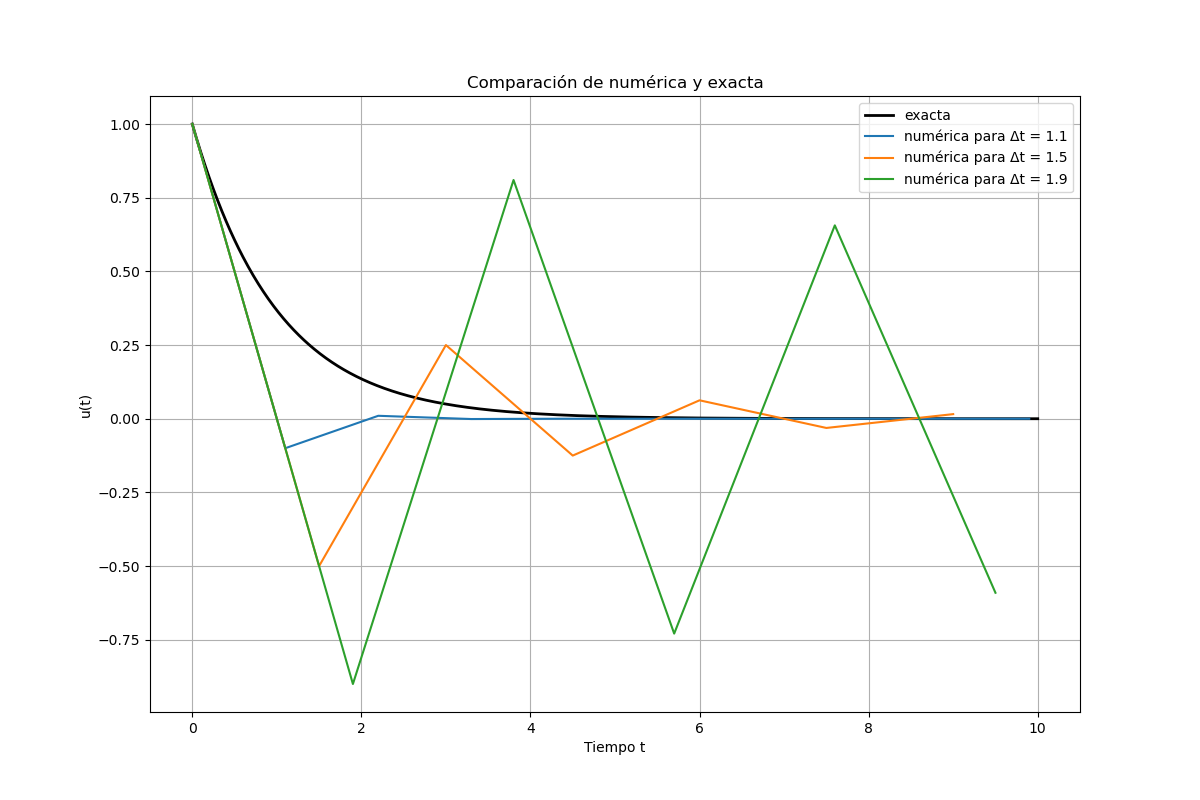

In [31]:
import numpy as np
import matplotlib.pyplot as plt
a = -1  
u0 = 1 
t_max = 10 
deltas = [1.1, 1.5, 1.9]  
t_exact = np.linspace(0, t_max, 1000) 
u_exact = np.exp(a * t_exact) 
def numerical_solution(a, u0, delta_t, t_max):
    steps = int(t_max / delta_t) 
    t_values = [i * delta_t for i in range(steps + 1)] 
    u_values = [u0]  
    
    for k in range(1, steps + 1):
        u_new = (1 + a * delta_t) ** k * u0  
        u_values.append(u_new)
    
    return t_values, u_values
plt.figure(figsize=(12, 8))

plt.plot(t_exact, u_exact, label='exacta', color='black', lw=2)

for delta in deltas:
    t_num, u_num = numerical_solution(a, u0, delta, t_max)
    plt.plot(t_num, u_num, label=f'numérica para Δt = {delta}')

plt.xlabel('Tiempo t')
plt.ylabel('u(t)')
plt.title('Comparación de numérica y exacta')
plt.legend()
plt.grid(True)
plt.show()
